<a href="https://colab.research.google.com/github/Leopernr23/Tareas/blob/main/proyecto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('ECOVSCOVID.csv')

# Informacion basica
print(df.info())
print(df.head())
print(df['COUNTRY'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50418 entries, 0 to 50417
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CODE     50418 non-null  object 
 1   COUNTRY  50418 non-null  object 
 2   DATE     50418 non-null  object 
 3   HDI      44216 non-null  float64
 4   TC       50418 non-null  float64
 5   TD       50418 non-null  float64
 6   STI      50418 non-null  float64
 7   POP      50418 non-null  float64
 8   GDPCAP   50418 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.5+ MB
None
  CODE      COUNTRY        DATE    HDI   TC   TD  STI        POP    GDPCAP
0  AFG  Afghanistan  2019-12-31  0.498  0.0  0.0  0.0  17.477233  7.497754
1  AFG  Afghanistan  2020-01-01  0.498  0.0  0.0  0.0  17.477233  7.497754
2  AFG  Afghanistan  2020-01-02  0.498  0.0  0.0  0.0  17.477233  7.497754
3  AFG  Afghanistan  2020-01-03  0.498  0.0  0.0  0.0  17.477233  7.497754
4  AFG  Afghanistan  2020-01-04  0.498  0.

                                DATE           HDI            TC  \
count                          50418  50418.000000  50418.000000   
mean   2020-06-17 15:44:08.911103232      0.720139      6.762125   
min              2019-12-31 00:00:00      0.000000      0.000000   
25%              2020-04-21 00:00:00      0.640000      4.158883   
50%              2020-06-21 00:00:00      0.723000      7.092574   
75%              2020-08-20 00:00:00      0.825000      9.504669   
max              2020-10-19 00:00:00      0.953000     15.914092   
std                              NaN      0.150680      3.637347   

                 TD           STI           POP        GDPCAP  
count  50418.000000  50418.000000  50418.000000  50418.000000  
mean       3.413681      3.178897     15.442097      8.318580  
min        0.000000      0.000000      6.695799      0.000000  
25%        0.000000      2.867331     14.151619      7.955479  
50%        3.178054      4.000583     15.929201      9.368531  
75%

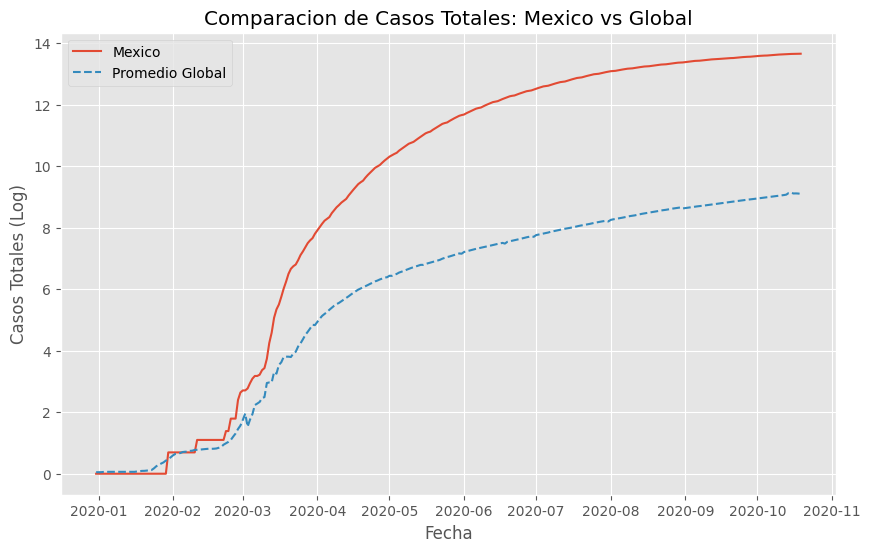

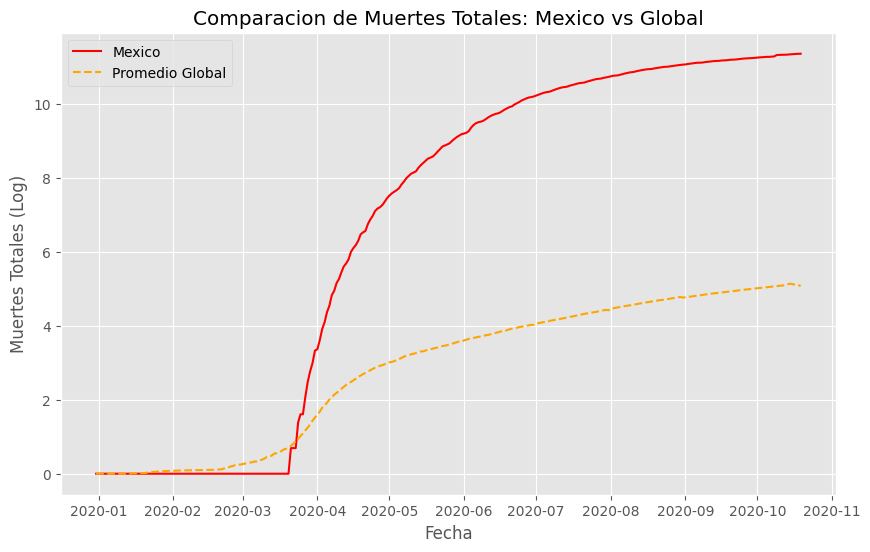

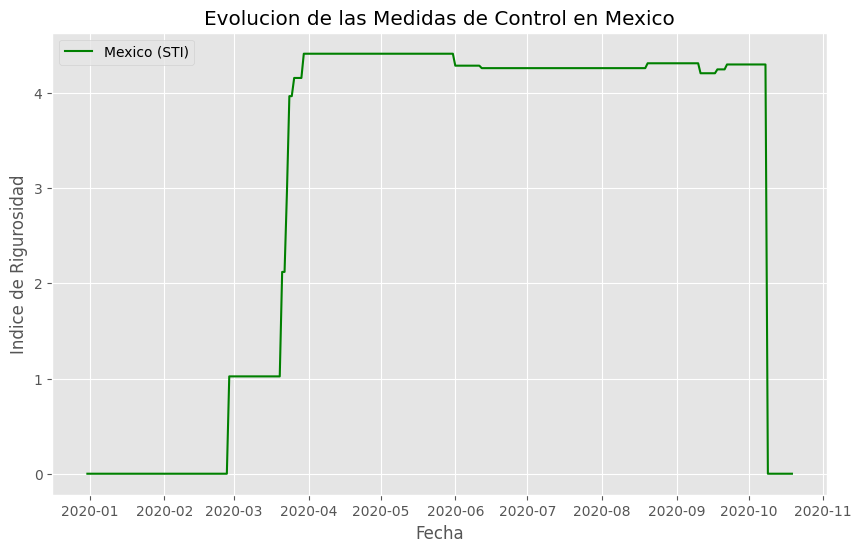

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargar datos
df = pd.read_csv('ECOVSCOVID.csv')

# Limpieza de datos
# Rellenar nulos de HDI con el promedio
hdi_prom = df['HDI'].mean()
df['HDI'] = df['HDI'].fillna(hdi_prom)

# Convertir fecha
df['DATE'] = pd.to_datetime(df['DATE'])

# Filtrar datos de Mexico
mex = df[df['COUNTRY'] == 'Mexico']

# Datos globales promedio por fecha
global_prom = df.groupby('DATE')[['TC', 'TD', 'STI']].mean().reset_index()

# Grafica 1: Casos Totales (TC)
plt.figure(figsize=(10, 6))
plt.plot(mex['DATE'], mex['TC'], label='Mexico')
plt.plot(global_prom['DATE'], global_prom['TC'], label='Promedio Global', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Casos Totales (Log)')
plt.title('Comparacion de Casos Totales: Mexico vs Global')
plt.legend()
plt.grid(True)


# Grafica 2: Muertes Totales (TD)
plt.figure(figsize=(10, 6))
plt.plot(mex['DATE'], mex['TD'], label='Mexico', color='red')
plt.plot(global_prom['DATE'], global_prom['TD'], label='Promedio Global', linestyle='--', color='orange')
plt.xlabel('Fecha')
plt.ylabel('Muertes Totales (Log)')
plt.title('Comparacion de Muertes Totales: Mexico vs Global')
plt.legend()
plt.grid(True)


# Grafica 3: Indice de Rigurosidad (STI)
plt.figure(figsize=(10, 6))
plt.plot(mex['DATE'], mex['STI'], label='Mexico (STI)', color='green')
plt.xlabel('Fecha')
plt.ylabel('Indice de Rigurosidad')
plt.title('Evolucion de las Medidas de Control en Mexico')
plt.legend()
plt.grid(True)


# Estadistica descriptiva para el reporte
desc_stats = df.describe()
print(desc_stats)